<a href="https://colab.research.google.com/github/Sachin0527/my_project1/blob/master/creditCardFraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

import pickle

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)

In [2]:
credit_card_data = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
credit_card_data.sample()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
3170,2745.0,1.110541,0.212428,0.53761,1.476218,-0.262395,-0.344631,0.142262,-0.078189,0.165504,...,-0.062755,0.049586,-0.044224,0.440124,0.63632,-0.336996,0.041561,0.023643,24.85,0


In [4]:
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit_card_data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
legit=credit_card_data[credit_card_data.Class==0]
fraud=credit_card_data[credit_card_data.Class==1]

In [8]:
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
6331      1
6334      1
6336      1
6338      1
6427      1
6446      1
6472      1
6529      1
6609      1
6641      1
6717      1
6719      1
6734      1
6774      1
6820      1
6870      1
6882      1
6899      1
6903      1
6971      1
8296      1
8312      1
8335      1
8615      1
8617      1
8842      1
8845      1
8972      1
9035      1
9179      1
9252      1
9487      1
9509      1
10204     1
10484     1
10497     1
10498     1
10568     1
10630     1
10690     1
10801     1
10891     1
10897     1
11343     1
11710     1
11841     1
11880     1
12070     1
12108     1
12261     1
12369     1
14104     1
14170     1
14197     1
14211     1
14338     1
15166     1
15204     1
15225     1
15451     1
15476     1
15506     1
15539     1
15566     1
15736     1
15751     1
15781     1
15810     1
16415     1
16780     1
16863     1
17317     1
17366     1
17407     1
17453     1
17480     1
18466     1
18472     1
1877

In [9]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [10]:
fraud.Amount.describe()


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [12]:
legit_sample = legit.sample(n=492)

In [13]:
new_df = pd.concat([legit_sample,fraud],axis=0)

In [ ]:
new_df


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
81198,58827.0,-0.628604,-2.763631,-0.877590,1.905540,-1.099312,-0.240110,1.439454,-0.318747,-0.191068,...,0.586545,-0.351279,-0.992400,0.383976,0.454271,-0.393391,-0.174695,0.167413,950.40,0
192007,129497.0,1.948752,-0.409378,-0.402572,0.253301,-0.499868,-0.052242,-0.668890,0.199590,1.136746,...,-0.142065,-0.373448,0.411133,0.694307,-0.473803,-0.675145,0.020801,-0.035323,6.95,0
65814,51757.0,-2.334705,2.490136,-0.241586,0.732436,-0.791710,-0.517337,-0.385109,1.213329,-0.299955,...,0.186138,0.551697,0.067910,0.063952,-0.156786,-0.362407,-0.594358,-0.352616,0.99,0
166039,117822.0,1.873501,-1.292506,-1.898019,-0.376750,-0.302375,-0.313058,-0.182886,-0.206041,-0.066789,...,-0.009603,0.137327,-0.174894,0.013225,0.223711,-0.023733,-0.036527,-0.024956,190.00,0
121952,76380.0,-1.144835,1.152753,1.955880,0.622462,-0.362553,0.863647,-0.261957,0.993070,-0.677555,...,0.097487,0.231372,-0.076790,-0.341675,0.032181,-0.313820,0.245173,0.073987,18.42,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [14]:
new_df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,95914.861789,0.040797,0.102532,-0.117417,0.011298,0.011677,0.019574,0.110570,-0.026399,0.047421,...,0.013738,-0.059494,-0.005233,-0.062026,0.033212,0.024997,0.044193,0.008813,0.014337,95.694573
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [15]:
X= new_df.drop(columns='Class',axis=1)
Y=new_df['Class']

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)

In [17]:
model1 = LogisticRegression()
model2 = RandomForestClassifier()
model3 = DecisionTreeClassifier()
model4 = xgb.XGBClassifier()

In [18]:
def model_train(model, x_train, y_train, x_test, y_test):
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    print('Accuracy Score: ',accuracy_score(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    with open(str(model)[:3] + '_mdl.pkl', 'wb') as f:
        pickle.dump(model,f)

In [21]:
model_train(model1, X_train, Y_train, X_test, Y_test)

Accuracy Score:  0.9593908629441624
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        99
           1       0.97      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [22]:
model_train(model2, X_train, Y_train, X_test, Y_test)

Accuracy Score:  0.9644670050761421
              precision    recall  f1-score   support

           0       0.95      0.98      0.97        99
           1       0.98      0.95      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [23]:
model_train(model3, X_train, Y_train, X_test, Y_test)

Accuracy Score:  0.9390862944162437
              precision    recall  f1-score   support

           0       0.95      0.93      0.94        99
           1       0.93      0.95      0.94        98

    accuracy                           0.94       197
   macro avg       0.94      0.94      0.94       197
weighted avg       0.94      0.94      0.94       197



In [24]:
model_train(model4, X_train, Y_train, X_test, Y_test)

Accuracy Score:  0.9644670050761421
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        99
           1       0.97      0.96      0.96        98

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score on Test Data : ', test_data_accuracy)

Accuracy score on Test Data :  0.9289340101522843


In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [26]:
y_pred_proba = model1.predict_proba(X_test)[:,1]

In [27]:
# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

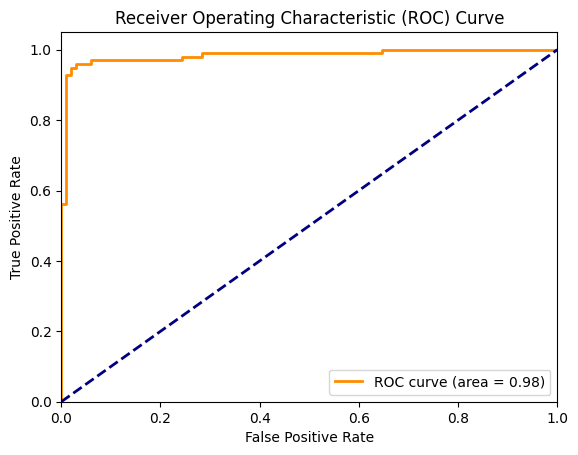

In [28]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
# Create a DataFrame with the values of features v1 and v2
new_data = pd.DataFrame({'Time':[1],
                         'V1': [-1.35981],
                         'V2': [-0.07278],
                         'V3': [2.535347],
                         'V4': [1.378155],
                         'V5': [-0.33832],
                         'V6': [0.462388],
                         'V7': [0.239599],
                         'V8': [0.098698],
                         'V9': [0.090794],
                         'V10': [0.363687],
                         'V11': [-0.5516],
                         'V12': [-0.6178],
                         'V13': [-0.99139],
                         'V14': [-0.3117],
                         'V15': [1.468177],
                         'V16': [-0.4704],
                         'V17': [0.207971],
                         'V18': [0.207971],
                         'V19': [0.403993],
                         'V20': [0.0251412],
                         'V21': [-0.018131],
                         'V22': [0.277838],
                         'V23': [-0.11047],
                         'V24': [0.066928],
                         'V25': [0.128239],
                         'V26': [-0.18911],
                         'V27': [0.122558],
                         'V28': [-0.02105],
                         'Amount':[149.62]

                        })

# Make predictions on the new data
predictions = model2.predict(new_data)

# Print the predictions
print("Predicted values:", predictions)

Predicted values: [0]


In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

# Print the predicted values
print("Predicted values:", y_pred)

# Assuming class 1 corresponds to fraud and class 0 corresponds to legitimate transactions
# Threshold for classifying as fraud (you may adjust this threshold as needed)
fraud_threshold = 0.5

# Determine if each transaction is fraud or legit based on the threshold
predictions = ['Fraud' if pred == 1 else 'Legitimate' for pred in y_pred]

# Print the predictions
for i, prediction in enumerate(predictions):
    print(f"Transaction {i+1}: {prediction}")

Predicted values: [1 1 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 0
 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 0 1 1 0 0 1 0
 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1
 0 0 0 0 0 1 1 0 1 1 1 0]
Transaction 1: Fraud
Transaction 2: Fraud
Transaction 3: Legitimate
Transaction 4: Legitimate
Transaction 5: Fraud
Transaction 6: Legitimate
Transaction 7: Fraud
Transaction 8: Fraud
Transaction 9: Legitimate
Transaction 10: Fraud
Transaction 11: Legitimate
Transaction 12: Fraud
Transaction 13: Fraud
Transaction 14: Legitimate
Transaction 15: Legitimate
Transaction 16: Fraud
Transaction 17: Legitimate
Transaction 18: Fraud
Transaction 19: Legitimate
Transaction 20: Fraud
Transaction 21: Legitimate
Transaction 22: Legitimate
Transaction 23: Legitimate
Transaction 24: Fraud
Tr